In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
%matplotlib inline

In [35]:
GENIECC1p = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC8_MC_BNB_extBNB.csv')
print len(GENIECC1p),'total CC1p',(100*float(len(GENIECC1p))/len(GENIECC1p)),'%'
GENIECC1pIsVertexContained = GENIECC1p[GENIECC1p.IsVertexContained==True]
print len(GENIECC1pIsVertexContained),'contained',(100*float(len(GENIECC1pIsVertexContained))/len(GENIECC1p)),'%'
GENIECC1pIsVertexReconstructed = GENIECC1pIsVertexContained[GENIECC1pIsVertexContained.IsVertexReconstructed==True]
print len(GENIECC1pIsVertexReconstructed),'tracks reconstructed',(100*float(len(GENIECC1pIsVertexReconstructed))/len(GENIECC1p)),'%'
GENIECC1p_in_FV = sample_in_FV( GENIECC1pIsVertexReconstructed )
print len(GENIECC1p_in_FV),'tracks reconstructed and contained',(100*float(len(GENIECC1p_in_FV))/len(GENIECC1p)),'%'
GENIECC1p_in_FV_close_proximity = GENIECC1p_in_FV[GENIECC1p_in_FV['distance']<11]
print len(GENIECC1p_in_FV_close_proximity),'tracks reconstructed and contained with a separation distance below 11 cm',(100*float(len(GENIECC1p_in_FV_close_proximity))/len(GENIECC1p)),'%'

12976 total CC1p 100.0 %
5299 contained 40.8369297164 %
1151 tracks reconstructed 8.87022194821 %
904 tracks reconstructed and contained 6.96670776819 %
745 tracks reconstructed and contained with a separation distance below 11 cm 5.74136868064 %


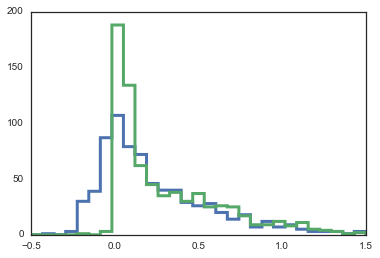

In [36]:
h,bins,_=plt.hist(GENIECC1p_in_FV_close_proximity.truth_Ev - GENIECC1p_in_FV_close_proximity.reco_CC1p_Ev,bins=np.linspace(-0.5,1.5,30),histtype='step',linewidth=3);
plt.hist(GENIECC1p_in_FV_close_proximity.truth_Ev - GENIECC1p_in_FV_close_proximity.reco_CC1p_Ev_fromE,bins=bins,histtype='step',linewidth=3);

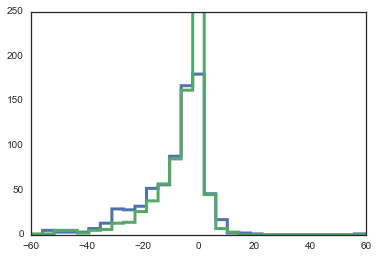

In [37]:
h,bins,_=plt.hist(GENIECC1p_in_FV_close_proximity.truth_theta_pq - GENIECC1p_in_FV_close_proximity.reco_CC1p_theta_pq,bins=np.linspace(-60,60,30),histtype='step',linewidth=3);
plt.hist(GENIECC1p_in_FV_close_proximity.truth_theta_pq - GENIECC1p_in_FV_close_proximity.reco_CC1p_theta_pq_fromE,bins=bins,histtype='step',linewidth=3);